In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing Clustering Lib

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [4]:
# for dendrogram

import scipy.cluster.hierarchy as sch

In [5]:
# for Validation 

from sklearn.metrics import silhouette_score as sil
from sklearn.metrics import calinski_harabasz_score as chs

In [6]:
# Normalization of data In UnSupervised ML is critical
from sklearn.preprocessing import normalize

## Normalize Data

In [7]:
crime = pd.read_csv('crime_data.csv')

In [8]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
crime.rename(columns={'Unnamed: 0':'City'},inplace=True)

In [10]:
crime.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [11]:
# taking only numerical data
crime_df = crime.iloc[:,1:]

In [12]:
array = normalize(crime_df)

normal_crime = pd.DataFrame(array,columns=crime_df.columns)

In [13]:
normal_crime.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


## Hierarchical Clustering

### Dendrogram - Visualization of clusters

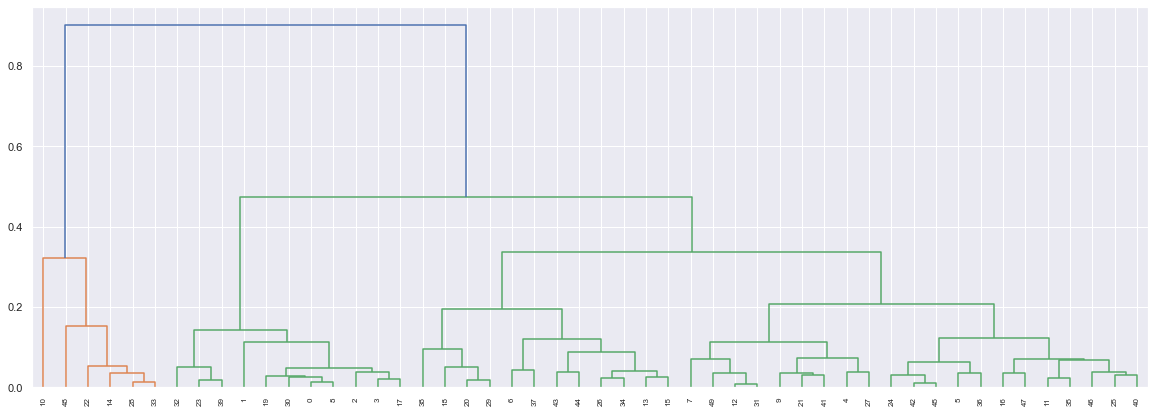

In [14]:
plt.figure(figsize=(20,7))

dendrogram_complete = sch.dendrogram(sch.linkage(normal_crime,method='complete'))

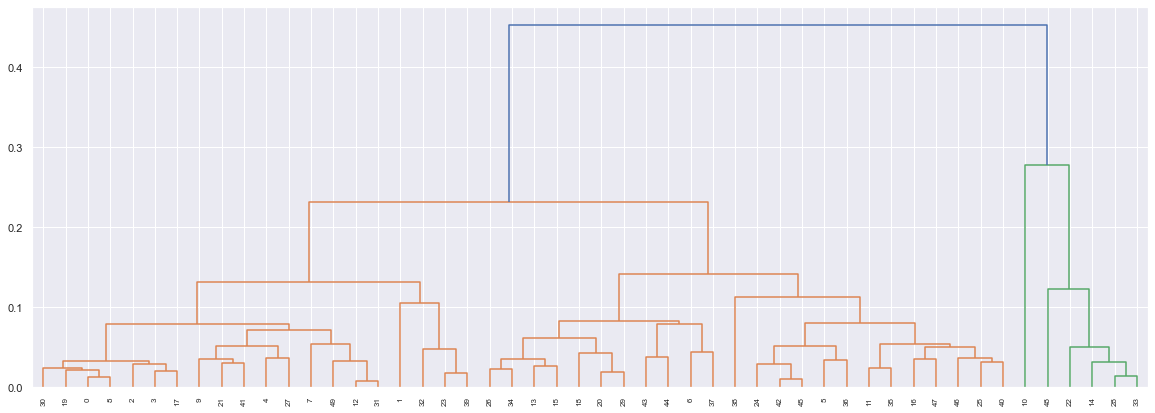

In [15]:
plt.figure(figsize=(20,7))

dendrogram_average = sch.dendrogram(sch.linkage(normal_crime,method='average'))

### Optimal No of Cluster

In [16]:
no_clusters = [2,3,4,5,6,7,8]

sil_score = []

for i in no_clusters:
    hc = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='complete')
    hc_cluster=hc.fit_predict(normal_crime)
    sil_score.append(sil(normal_crime,hc_cluster))

In [17]:
sil_score = []

for i in range(2,11):
    hc = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='complete')
    hc_cluster = hc.fit_predict(normal_crime)
    sil_score.append(sil(normal_crime,hc_cluster)) 

Text(0.5, 1.0, 'Silhouette Score for Hierarchical Clustering')

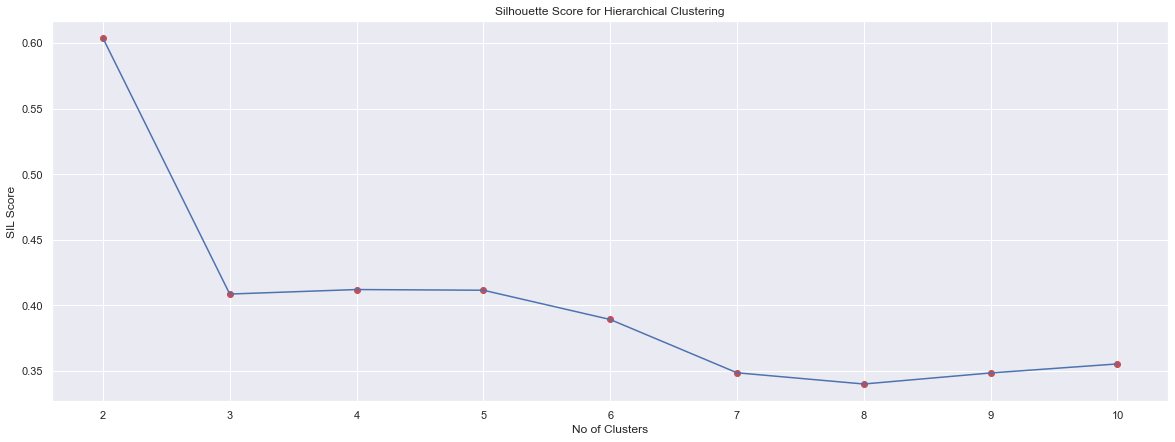

In [18]:
#ploting for Silhouette score 

plt.figure(figsize=(20,7))
plt.plot(range(2,11),sil_score)
plt.scatter(range(2,11),sil_score,color='r')

plt.xlabel('No of Clusters')
plt.ylabel('SIL Score')
plt.title('Silhouette Score for Hierarchical Clustering')

In [ ]:
# According to Silhouette Score - Optimal Clusters = 2 (max Score)

### Creating Cluster

In [19]:
# creating the Hierarchical Model 
hc_model = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')

hc_clusters = hc_model.fit_predict(normal_crime)

In [20]:
# clusters 
hc_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0], dtype=int64)

In [21]:
#copy of data
crime_hc = crime

In [22]:
crime_hc['Cluster'] = hc_clusters

In [23]:
crime_hc['Cluster'].value_counts()

0    44
1     6
Name: Cluster, dtype: int64

In [24]:
crime_hc.head()

,City,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [25]:
crime_hc.groupby('Cluster')['City'].apply(lambda x: tuple(x))

Cluster
0    (Alabama, Alaska, Arizona, Arkansas, Californi...
1    (Hawaii, Iowa, Minnesota, New Hampshire, North...
Name: City, dtype: object

In [26]:
crime_hc.groupby('Cluster')['Assault'].mean()

Cluster
0    186.568182
1     54.833333
Name: Assault, dtype: float64

## KMeans Clustering

### Optimal Clusters By Inertia 

In [27]:
inertia = []

for i in range(1,11):
    km = KMeans(n_clusters=i,max_iter=100)
    km_clusters = km.fit_predict(normal_crime)
    
    inertia.append(km.inertia_)


Text(0.5, 1.0, 'Inertia Score for KMeans Clustering')

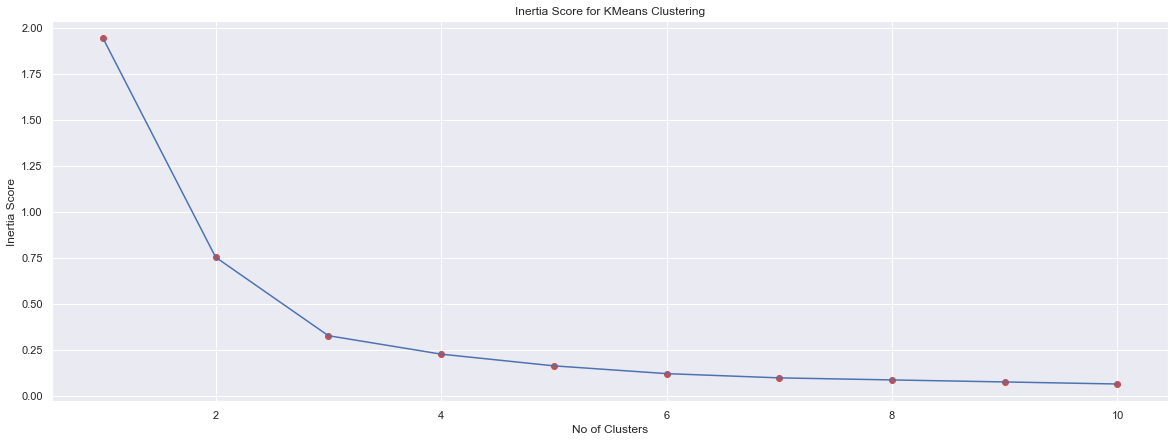

In [28]:
#ploting for Inertia score 

plt.figure(figsize=(20,7))
plt.plot(range(1,11),inertia)
plt.scatter(range(1,11),inertia,color='r')

plt.xlabel('No of Clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia Score for KMeans Clustering')

In [ ]:
# abrupt change = 2 clusters

### Creating Clusters

In [29]:
# creating a kmeans Model

km_model = KMeans(n_clusters=2,max_iter=100)

km_clusters = km_model.fit_predict(normal_crime)

In [30]:
km_clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1])

In [31]:
np.unique(km_clusters)

array([0, 1])

In [32]:
# copy of data

crime_km = crime

In [33]:
crime_km['Cluster']=km_clusters

In [34]:
crime_km['Cluster'].value_counts()

1    33
0    17
Name: Cluster, dtype: int64

In [35]:
crime_km.head()

,City,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,1


In [36]:
crime_km[crime_km['Cluster']==1]

,City,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1
11,Idaho,2.6,120,54,14.2,1


In [37]:
crime_km[crime_km['Cluster']==0]

,City,Murder,Assault,UrbanPop,Rape,Cluster
6,Connecticut,3.3,110,77,11.1,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
18,Maine,2.1,83,51,7.8,0
20,Massachusetts,4.4,149,85,16.3,0
22,Minnesota,2.7,72,66,14.9,0
26,Nebraska,4.3,102,62,16.5,0
28,New Hampshire,2.1,57,56,9.5,0


## DBSCAN Clustering

In [38]:
# creating a DBSCAN Model
dbs_model = DBSCAN(eps=0.2,min_samples=4)

dbs_cluster = dbs_model.fit_predict(normal_crime)

In [39]:
# creating the clusters
dbs_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [40]:
#copy of data
crime_dbs = crime

In [41]:
crime_dbs['Cluster']=dbs_cluster

In [42]:
crime_dbs.head()

,City,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
